In [6]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pandas as pd
import pickle

import bacco
import baccoemu

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import utils
import plotter
# import data_creation_pipeline as dcp
# import compute_biased_pks_fields as cpk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
idx_LH_str = '0663'
sim_name_quijote = f'quijote_LH{idx_LH_str}'

dir_data = '/cosmos_storage/home/mpelle/Yin_data/Quijote'
fn_params = f'{dir_data}/LH{idx_LH_str}/param_{idx_LH_str}.txt'
param_vals = np.loadtxt(fn_params)
param_names = ['omega_m', 'omega_baryon', 'h', 'n_s', 'sigma_8']
param_dict = dict(zip(param_names, param_vals))
cosmo_quijote = utils.get_cosmo(param_dict)

Param tau not in param dict, adding quijote value
Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value


In [3]:
box_size = 1000.
n_grid = 512

In [4]:
ngenic_phases = False
phase_type = 0

seed = int(idx_LH_str)
expfactor = 1.0
FixedInitialAmplitude = False

sim, disp_fromlpt = bacco.utils.create_lpt_simulation(cosmo_quijote, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor, LPT_order=2, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-16 00:23:09,314 bacco.util : Setting ngenic_phases=False overruns provided value of phase_type. This will generate a Gadget-3 compatible phase field without Ngenic
2024-08-16 00:23:09,316 bacco.sims : Setting ngenic_phases=False overruns provided value of phase_type. This will generate a Gadget-3 compatible phase field without Ngenic
2024-08-16 00:23:09,317 bacco.sims : Initialising simulation Default
2024-08-16 00:23:09,318 bacco.sims : ...done in 0.00202 s


bacco.lss_scaler : 293 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=0; precision=single 
bacco.lss: computing seed table
bacco.lss_scaler: Computing 2LPT density...
l2=7.78209e-18 
l2=6.73432e-17 
l2=-3.85992e-17 
l2=-3.25662e-18 
l2=-4.83533e-17 
l2=-1.04182e-16 
bacco.lss_scaler: Fourier transforming second order source...
l2=-2.14218e-08 l3a=3.10621e-08 l3b=4.35151e-08


2024-08-16 00:23:38,158 bacco.scaler : Adding displacement field with a vel-factor=53.391221


bacco.lss_scaler:  Adding LSS displacement: vel_factor=53.391221 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [5]:
dens_lin_fromlpt = sim.get_linear_field(ngrid=n_grid, quantity='delta')

bacco.lss_scaler : 293 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=0; precision=single 
bacco.lss: computing seed table


### Try with the lagrangian indices

In [7]:
idx_LH = '663'
fn_lag_index = f"/cosmos_storage/data_sharing/quijote_{idx_LH}_neighfile.pickle"
with open(fn_lag_index, 'rb') as f:
    lag_index = pickle.load(f)
print(lag_index.shape)

(134217728,)


In [8]:
bmodel_lagind = bacco.BiasModel(sim=None, linear_delta=dens_lin_fromlpt, ngrid=n_grid, ngrid1=None,
                        sdm=False, mode="dm", # these are the defaults - but do we need to change for bacco?
                        BoxSize=box_size,
                        npart_for_fake_sim=n_grid, #damping_scale=damping_scale,
                        bias_model='expansion', deposit_method="cic",
                        use_displacement_of_nn=False, interlacing=False,
                        indices=lag_index, indices_vel=None, sdmhids=None # NEW! 
                        )

2024-08-16 00:27:03,472 bacco.BiasModel : Initialising Bias Model class ...


In [9]:
bias_fields_lagind = bmodel_lagind.bias_terms_lag()

2024-08-16 00:27:08,793 bacco.BiasModel : Computing delta_to_tidal_field with 48 threads...
2024-08-16 00:27:08,795 bacco.BiasModel : fttw plan
2024-08-16 00:27:08,796 bacco.BiasModel : Computing linear field ...
2024-08-16 00:27:08,798 bacco.BiasModel : Memory used: 8.57915392 Gigabytes
2024-08-16 00:27:08,822 bacco.BiasModel : fttw freqs
2024-08-16 00:27:08,823 bacco.BiasModel : tidk freqs


linear field, damping_scale: 100
lindelt not none


2024-08-16 00:29:14,661 bacco.BiasModel : ifft
2024-08-16 00:29:56,708 bacco.BiasModel : Computing laplacian ...
2024-08-16 00:29:56,711 bacco.BiasModel : Memory used: 18.267869184 Gigabytes
2024-08-16 00:33:44,653 bacco.BiasModel : Computing bias terms in lagrangian coords ...
2024-08-16 00:33:44,656 bacco.BiasModel : Memory used: 19.338440704 Gigabytes
2024-08-16 00:33:44,796 bacco.BiasModel : Computing delta squared ...
2024-08-16 00:33:44,798 bacco.BiasModel : Memory used: 19.87526656 Gigabytes
2024-08-16 00:33:46,468 bacco.BiasModel : Computing tidal component G2 with the given tidal field
2024-08-16 00:33:46,469 bacco.BiasModel : Memory used: 20.949078016 Gigabytes


In [44]:
lin_field_lagind = bmodel_lagind.linear_field

In [42]:
bmodel = bacco.BiasModel(sim=None, linear_delta=dens_lin_fromlpt, ngrid=n_grid, ngrid1=None,
                        sdm=False, mode="dm", # these are the defaults - but do we need to change for bacco?
                        BoxSize=box_size,
                        npart_for_fake_sim=n_grid, #damping_scale=damping_scale,
                        bias_model='expansion', deposit_method="cic",
                        use_displacement_of_nn=False, interlacing=False,
                        )

2024-08-16 01:17:59,775 bacco.BiasModel : Initialising Bias Model class ...


In [43]:
lin_field = bmodel.linear_field

2024-08-16 01:18:34,943 bacco.BiasModel : Computing linear field ...
2024-08-16 01:18:34,944 bacco.BiasModel : Memory used: 28.51831808 Gigabytes


linear field, damping_scale: 100
lindelt not none


In [53]:
print(np.allclose(lin_field, lin_field_lagind))

True


### Get pos various ways

In [12]:
fn_disp = f'{dir_data}/LH{idx_LH_str}/dis_{idx_LH_str}.npy'
disp = np.load(fn_disp) # sim
n_grid = disp.shape[-1]

grid = bacco.visualization.uniform_grid(npix=n_grid, L=box_size, ndim=3, bounds=False)

pos = bacco.scaler.add_displacement(None,
                                disp,
                                box=box_size,
                                pos=grid.reshape(-1,3),
                                vel=None,
                                vel_factor=0,
                                verbose=False)[0]

In [17]:
import readgadget

snapshot = '/dipc/kstoreyf/Quijote_simulations/Snapshots/latin_hypercube/663/snapdir_004/snap_004'
ptype    = [1] #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)

# read positions, velocities and IDs of the particles
pos_raw = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h
ids = readgadget.read_block(snapshot, "ID  ", ptype)-1   #IDs starting from 0

In [21]:
# ics
snapshot_ics = '/dipc/kstoreyf/Quijote_simulations/Snapshots/latin_hypercube/663/ICs/ics'
ids_ics = readgadget.read_block(snapshot_ics, "ID  ", ptype)-1   #IDs starting from 0
pos_raword = pos_raw[ids_ics]

In [61]:
pos_raw_lagind = pos_raw[lag_index]

In [48]:
bias_term_eul_delta = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos, 
                                #mass = (bias_fields_lagind[1]).flatten(), 
                                mass = lin_field.flatten(),
                                deposit_method='cic', 
                                interlacing=False)

2024-08-16 01:20:53,912 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-16 01:20:54,345 bacco.statistics : starting deposit 1
2024-08-16 01:20:55,237 bacco.statistics :  mesh done in 1.32 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


In [45]:
bias_term_eul_delta_lagind = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos, 
                                #mass = (bias_fields_lagind[1]).flatten(), 
                                mass = lin_field_lagind.flatten(),
                                deposit_method='cic', 
                                interlacing=False)

2024-08-16 01:19:27,679 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-16 01:19:28,084 bacco.statistics : starting deposit 1
2024-08-16 01:19:28,964 bacco.statistics :  mesh done in 1.29 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


In [22]:
bias_term_eul_delta_lagind_raw = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_raword, 
                                 mass = lin_field_lagind.flatten(), 
                                 deposit_method='cic', 
                                 interlacing=False)

2024-08-16 00:51:22,064 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-16 00:51:22,494 bacco.statistics : starting deposit 1
2024-08-16 00:51:23,515 bacco.statistics :  mesh done in 1.45 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


In [62]:
bias_term_eul_delta_raw_lagind = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, 
                                                               pos=pos_raw_lagind, 
                                                                mass = lin_field.flatten(), 
                                                                deposit_method='cic', 
                                                                interlacing=False)

2024-08-16 01:28:49,638 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-16 01:28:50,027 bacco.statistics : starting deposit 1
2024-08-16 01:28:50,899 bacco.statistics :  mesh done in 1.26 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


### Measure Pks

In [14]:
norm=n_grid**3
normalise_grid = False
deconvolve_grid = True
k_min = 0.01
k_max = 0.68
n_bins = 30
log_binning = True
correct_grid = True

args_power = {
                'interlacing':False,
                'kmin':k_min,
                'kmax':k_max,
                'nbins':n_bins,
                'log_binning':log_binning,
                'deposit_method':'cic',
                'correct_grid': correct_grid,
                'compute_correlation':False,
                'zspace':False, #we include the velocities before
                'compute_power2d':False}

In [46]:
pairs = [[dens_lin_fromlpt, dens_lin_fromlpt], 
         [bias_term_eul_delta_lagind, bias_term_eul_delta_lagind],
         [dens_lin_fromlpt, bias_term_eul_delta_lagind]]
pk_objs_lagind = []
for pair in pairs:
    pk_obj = bacco.statistics.compute_crossspectrum_twogrids(
                            grid1=pair[0]/norm,
                            grid2=pair[1]/norm,
                            cosmology=cosmo_quijote,
                            ngrid=n_grid,
                            box=box_size,
                            normalise_grid1=normalise_grid,
                            normalise_grid2=normalise_grid,
                            deconvolve_grid1=deconvolve_grid,
                            deconvolve_grid2=deconvolve_grid,
                            **args_power)
    pk_objs_lagind.append(pk_obj)

2024-08-16 01:19:36,363 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.01429e-11 (grid1) -1.01429e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.229222 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.335718 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000378 secs
bacco.power : Deallocating arrays


2024-08-16 01:19:43,073 bacco.statistics :  ...done in 6.71 s
2024-08-16 01:19:44,851 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.28033e-10 (grid1) -4.28033e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.402780 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.389427 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000333 secs
bacco.power : Deallocating arrays


2024-08-16 01:19:51,271 bacco.statistics :  ...done in 6.42 s
2024-08-16 01:19:53,078 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.01429e-11 (grid1) -4.28033e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.334822 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.387813 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000495 secs
bacco.power : Deallocating arrays


2024-08-16 01:19:58,863 bacco.statistics :  ...done in 5.79 s


/tmp/ipykernel_70325/3603953305.py:10: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])


(-0.15, 0.15)

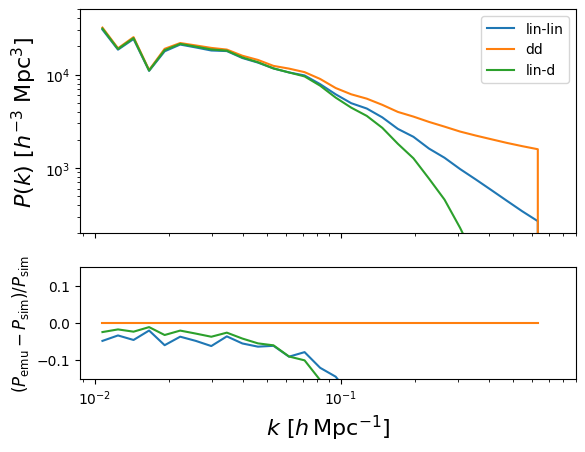

In [47]:
labels = ['lin-lin', 'dd', 'lin-d']
i_fid = 1

pk_objs = pk_objs_lagind

fig, axarr = plt.subplots(2, 1, sharex=True, height_ratios=[2, 1])
ax, ax1 = axarr
for i, pk_obj in enumerate(pk_objs):
    ax.plot(pk_obj['k'], pk_obj['pk'], label=labels[i])
    ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])      
ax.set_xscale('log')
ax.set_yscale('log')


axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)

ax.legend()
ax.set_ylim(2e2, 5e4)
ax1.set_ylim(-0.15, 0.15)

In [23]:
pairs = [[dens_lin_fromlpt, dens_lin_fromlpt], 
         [bias_term_eul_delta_lagind_raw, bias_term_eul_delta_lagind_raw],
         [dens_lin_fromlpt, bias_term_eul_delta_lagind]]
pk_objs_lagind_raw = []
for pair in pairs:
    pk_obj = bacco.statistics.compute_crossspectrum_twogrids(
                            grid1=pair[0]/norm,
                            grid2=pair[1]/norm,
                            cosmology=cosmo_quijote,
                            ngrid=n_grid,
                            box=box_size,
                            normalise_grid1=normalise_grid,
                            normalise_grid2=normalise_grid,
                            deconvolve_grid1=deconvolve_grid,
                            deconvolve_grid2=deconvolve_grid,
                            **args_power)
    pk_objs_lagind_raw.append(pk_obj)

2024-08-16 00:51:35,830 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.01429e-11 (grid1) -1.01429e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.265967 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.396472 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000175 secs
bacco.power : Deallocating arrays


2024-08-16 00:51:41,970 bacco.statistics :  ...done in 6.14 s
2024-08-16 00:51:43,875 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 6.98415e-12 (grid1) 6.98415e-12 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.300915 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.402211 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000317 secs
bacco.power : Deallocating arrays


2024-08-16 00:51:49,932 bacco.statistics :  ...done in 6.06 s
2024-08-16 00:51:51,548 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.01429e-11 (grid1) -3.5112e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.540364 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.353657 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000443 secs
bacco.power : Deallocating arrays


2024-08-16 00:51:58,245 bacco.statistics :  ...done in 6.7 s


/tmp/ipykernel_70325/3351023428.py:10: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])


(-0.15, 0.15)

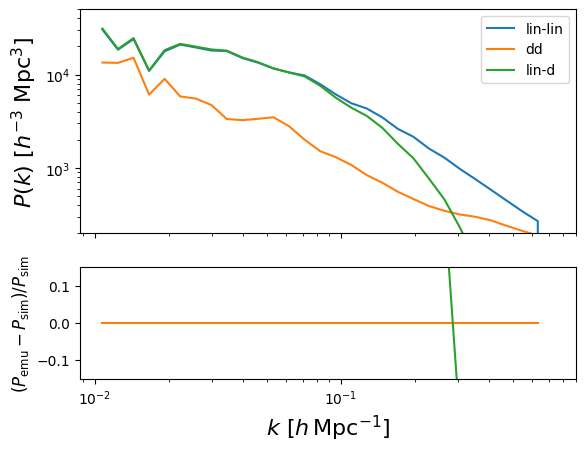

In [24]:
labels = ['lin-lin', 'dd', 'lin-d']
i_fid = 1

pk_objs = pk_objs_lagind_raw

fig, axarr = plt.subplots(2, 1, sharex=True, height_ratios=[2, 1])
ax, ax1 = axarr
for i, pk_obj in enumerate(pk_objs):
    ax.plot(pk_obj['k'], pk_obj['pk'], label=labels[i])
    ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])      
ax.set_xscale('log')
ax.set_yscale('log')


axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)

ax.legend()
ax.set_ylim(2e2, 5e4)
ax1.set_ylim(-0.15, 0.15)

In [63]:
pairs = [[dens_lin_fromlpt, dens_lin_fromlpt], 
         [bias_term_eul_delta_raw_lagind, bias_term_eul_delta_raw_lagind],
         [dens_lin_fromlpt, bias_term_eul_delta_raw_lagind]]
pk_objs_raw_lagind = []
for pair in pairs:
    pk_obj = bacco.statistics.compute_crossspectrum_twogrids(
                            grid1=pair[0]/norm,
                            grid2=pair[1]/norm,
                            cosmology=cosmo_quijote,
                            ngrid=n_grid,
                            box=box_size,
                            normalise_grid1=normalise_grid,
                            normalise_grid2=normalise_grid,
                            deconvolve_grid1=deconvolve_grid,
                            deconvolve_grid2=deconvolve_grid,
                            **args_power)
    pk_objs_raw_lagind.append(pk_obj)

2024-08-16 01:29:26,405 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.01429e-11 (grid1) -1.01429e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.497674 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.371243 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000360 secs
bacco.power : Deallocating arrays


2024-08-16 01:29:32,711 bacco.statistics :  ...done in 6.31 s
2024-08-16 01:29:34,498 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -3.0414e-10 (grid1) -3.0414e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.541981 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.409532 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000201 secs
bacco.power : Deallocating arrays


2024-08-16 01:29:40,838 bacco.statistics :  ...done in 6.34 s
2024-08-16 01:29:42,746 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.01429e-11 (grid1) -3.0414e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.323982 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.334916 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000198 secs
bacco.power : Deallocating arrays


2024-08-16 01:29:48,557 bacco.statistics :  ...done in 5.81 s


/tmp/ipykernel_70325/3212884568.py:10: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])


(-0.15, 0.15)

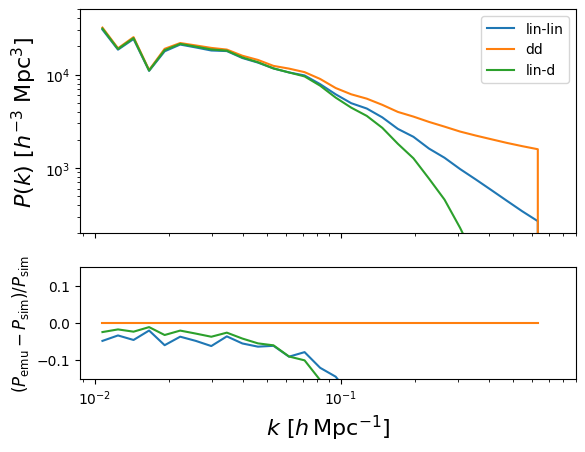

In [64]:
labels = ['lin-lin', 'dd', 'lin-d']
i_fid = 1

pk_objs = pk_objs_raw_lagind

fig, axarr = plt.subplots(2, 1, sharex=True, height_ratios=[2, 1])
ax, ax1 = axarr
for i, pk_obj in enumerate(pk_objs):
    ax.plot(pk_obj['k'], pk_obj['pk'], label=labels[i])
    ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])      
ax.set_xscale('log')
ax.set_yscale('log')


axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)

ax.legend()
ax.set_ylim(2e2, 5e4)
ax1.set_ylim(-0.15, 0.15)

### Check plots

In [29]:
n_grid = 512
pos_mesh = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos, 
                                         deposit_method='cic', interlacing=False)
pos_mesh = np.squeeze(pos_mesh)

2024-08-16 01:09:25,591 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-16 01:09:25,592 bacco.statistics : starting deposit 1
2024-08-16 01:09:26,362 bacco.statistics :  mesh done in 0.771 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


In [30]:
n_grid = 512
pos_mesh_raw = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_raw, 
                                         deposit_method='cic', interlacing=False)
pos_mesh_raw = np.squeeze(pos_mesh_raw)

2024-08-16 01:09:42,569 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-16 01:09:42,570 bacco.statistics : starting deposit 1
2024-08-16 01:09:43,193 bacco.statistics :  mesh done in 0.625 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


In [34]:
n_grid = 512
pos_mesh_raword = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_raword, 
                                         deposit_method='cic', interlacing=False)
pos_mesh_raword = np.squeeze(pos_mesh_raword)

2024-08-16 01:11:22,973 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-16 01:11:22,974 bacco.statistics : starting deposit 1
2024-08-16 01:11:23,929 bacco.statistics :  mesh done in 0.957 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


0.0 1313.9652
0.0 1313.9652
(512, 512, 512)
(512, 512)


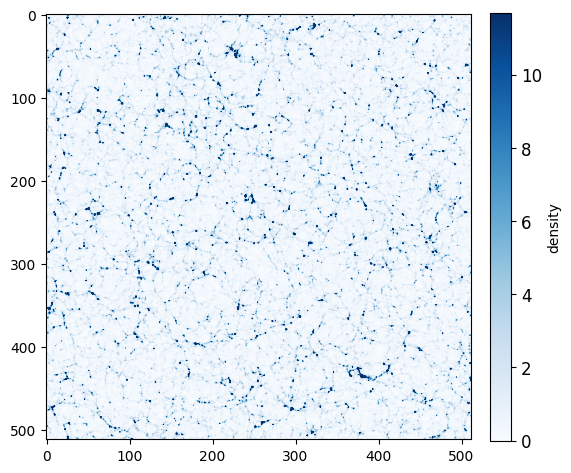

In [32]:
plotter.plot_field(pos_mesh, overdensity=False)

0.0 1313.9601
0.0 1313.9601
(512, 512, 512)
(512, 512)


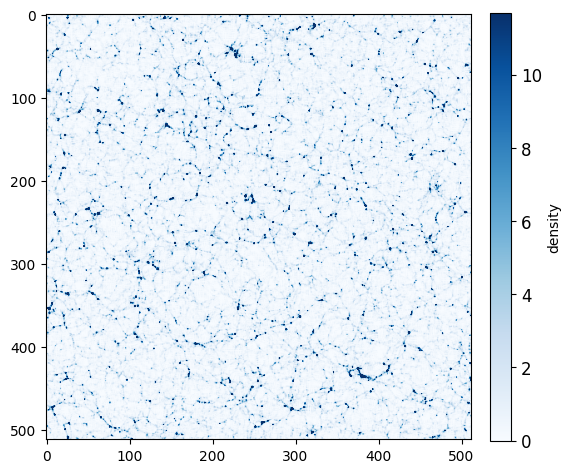

In [33]:
plotter.plot_field(pos_mesh_raw, overdensity=False)

0.0 1313.9615
0.0 1313.9615
(512, 512, 512)
(512, 512)


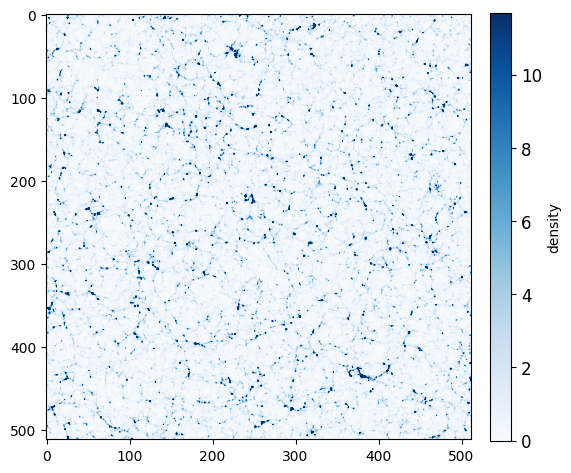

In [35]:
plotter.plot_field(pos_mesh_raword, overdensity=False)

-15.754271507263184 14.615114212036133
-15.754271507263184 14.615114212036133
(512, 512, 512)
(512, 512)


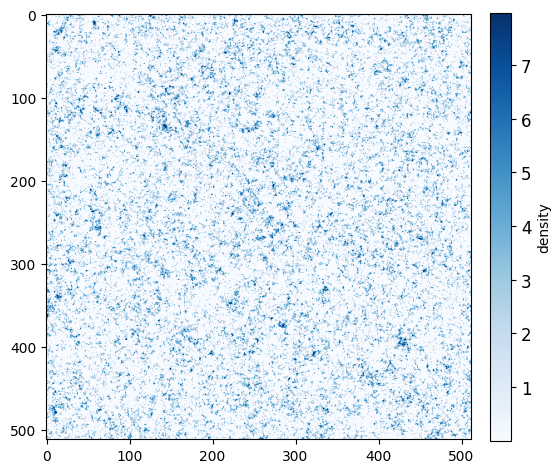

In [25]:
plotter.plot_field(dens_lin_fromlpt, overdensity=False)

-15.754271507263184 14.615114212036133
-15.754271507263184 14.615114212036133
(512, 512, 512)
(512, 512)


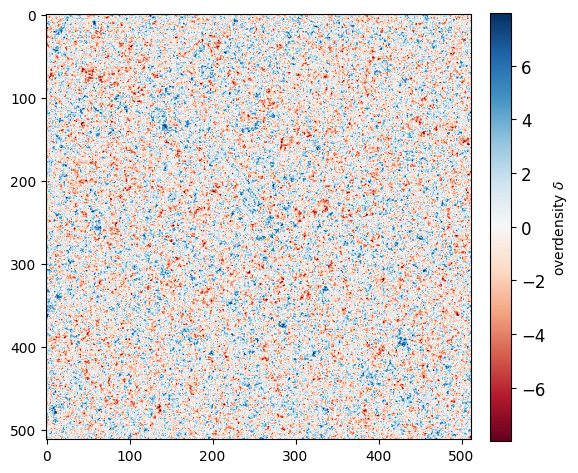

In [50]:
plotter.plot_field(lin_field, overdensity=True)

-15.754271507263184 14.615114212036133
-15.754271507263184 14.615114212036133
(512, 512, 512)
(512, 512)


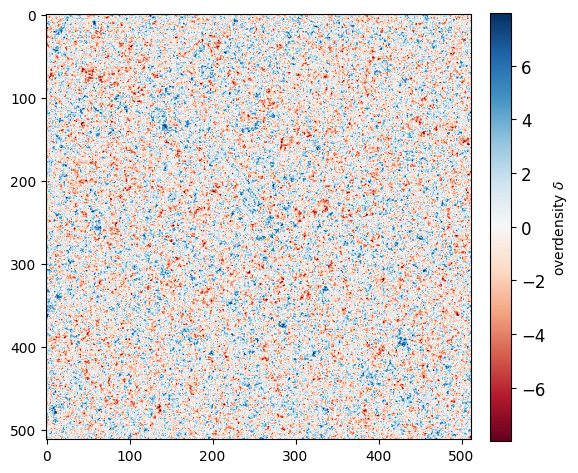

In [52]:
plotter.plot_field(lin_field_lagind, overdensity=True)

-14.950049 2884.1284
-14.950049 2884.1284
(512, 512, 512)
(512, 512)


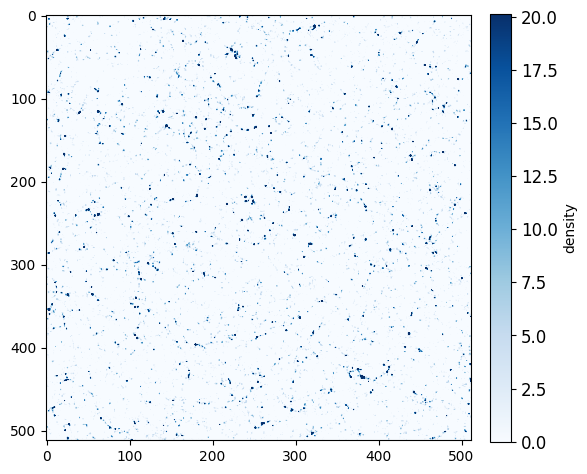

In [28]:
plotter.plot_field(bias_term_eul_delta_lagind[0], overdensity=False)

-544.7721 577.5976
-544.7721 577.5976
(512, 512, 512)
(512, 512)


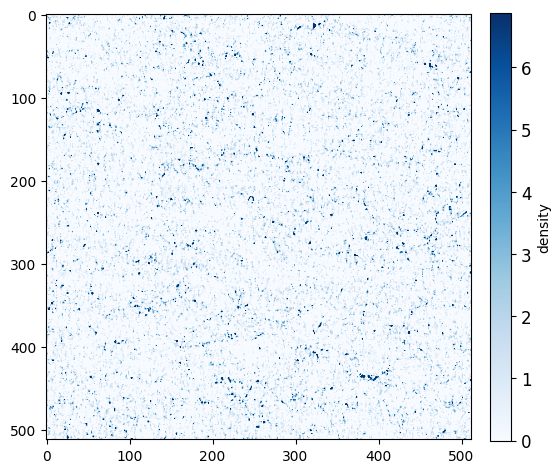

In [27]:
plotter.plot_field(bias_term_eul_delta_lagind_raw[0], overdensity=False)

### check pos

In [36]:
diff = pos - pos_raword
diff = (diff + box_size/2) % box_size - box_size/2

In [38]:
np.min(diff), np.max(diff)

(-500.0, 500.0)

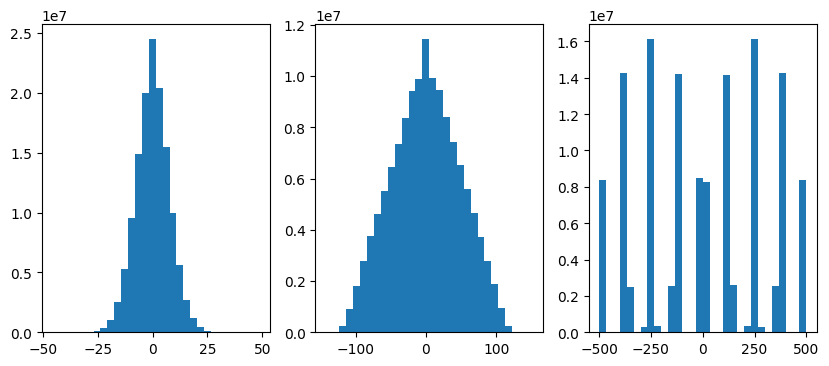

In [41]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [55]:
diff = pos - pos_raw_lagind
diff = (diff + box_size/2) % box_size - box_size/2

In [57]:
diff

array([[6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       [6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       [6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       ...,
       [0.0000000e+00, 6.1035156e-05, 6.1035156e-05],
       [6.1035156e-05, 6.1035156e-05, 0.0000000e+00],
       [6.1035156e-05, 6.1035156e-05, 6.1035156e-05]], dtype=float32)

In [58]:
np.min(diff), np.max(diff)

(-3.0517578e-05, 6.1035156e-05)

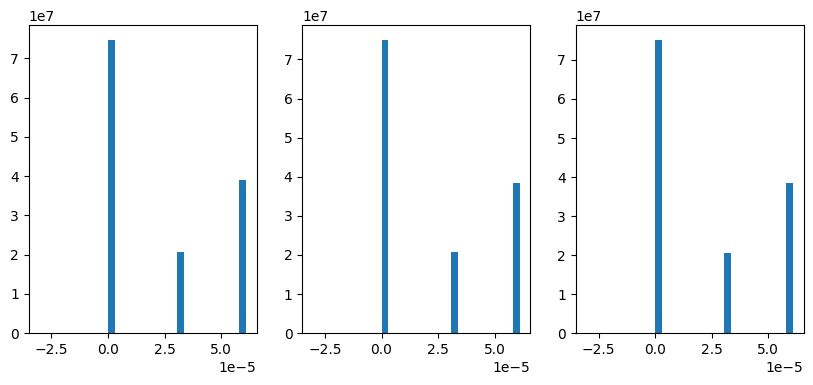

In [56]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [59]:
diff = pos_raw - pos_raw_lagind
diff = (diff + box_size/2) % box_size - box_size/2

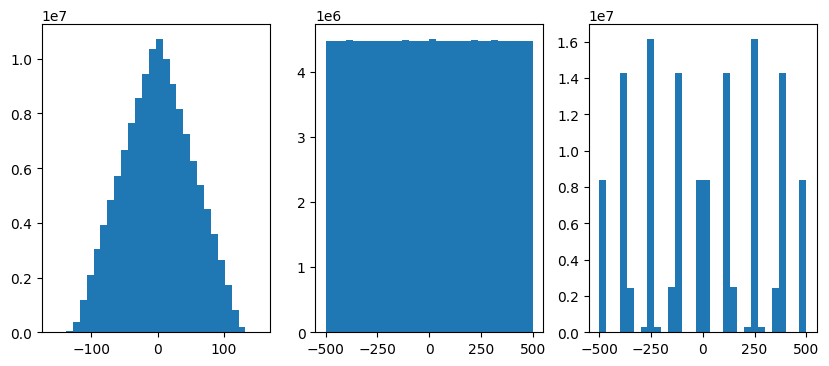

In [60]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)